# Exploring and processing the datasets

## Importing the libraries

In [1]:
import os
import shutil
import matplotlib.pyplot as plt
import splitfolders

> Ths notebook will explore the dataset and create the final dataset

## 1. Exploring the dataset

### 1.1 How balanced are the datasets?

#### Get required information on the raw datasets

In [2]:
raw_zenodo_path = './datasets/data/raw/Dataset (Vehicles)'
raw_vtid2_path = './datasets/data/raw/htsngg9tpc-2'

In [3]:
def get_dataset_info(dataset_path):

  classes = os.listdir(dataset_path)
  classes.remove('.DS_Store')
  data = {}

  for item in classes:
      path = dataset_path + "/" + item
      no_of_files = len([i for i in os.listdir(path) if os.path.isfile(os.path.join(path, i))])
      data[item] = no_of_files

  return data

print(get_dataset_info(raw_zenodo_path))
print(get_dataset_info(raw_vtid2_path))
zenodo_info = get_dataset_info(raw_zenodo_path)
vtid2_info = get_dataset_info(raw_vtid2_path)


{'car': 800, 'bike': 800, 'pickup': 800, 'minibus': 800, 'truck': 800, 'juggernaut': 800}
{'hatchback': 606, 'other': 600, 'pickup': 1240, 'suv': 680, 'sedan': 1230}


#### Plot a bar plot on the Zenodo dataset to see how balanced it is

<BarContainer object of 6 artists>

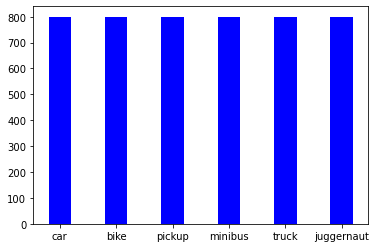

In [4]:
plt.bar(zenodo_info.keys(), zenodo_info.values(), color ='blue',
        width = 0.4)

#### Plot a bar plot on the VTID2 dataset to see how balanced it is

<BarContainer object of 5 artists>

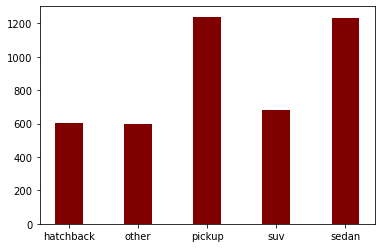

In [5]:
plt.bar(vtid2_info.keys(), vtid2_info.values(), color ='maroon',
        width = 0.4)

### 1.2 What does the dataset look like?

**Display images of both the datasets**

## 2. Create train, validation, and test split

### 2.1 Renaming 'other' folder in vtid2 dataset to bike

In [26]:
if os.path.exists(raw_vtid2_path + '/' + 'other'):
  os.rename(raw_vtid2_path + '/' + 'other', raw_vtid2_path + '/' + 'bike')


In [27]:
input_path_zenodo = raw_zenodo_path
output_path_zenodo = 'datasets/data/split/Zenodo'

input_path_vtid = raw_vtid2_path
output_path_vtid = 'datasets/data/split/VTID2'

if os.path.exists('./datasets/data/split') and os.path.isdir('./datasets/data/split'):
    shutil.rmtree('./datasets/data/split')

splitfolders.ratio(input_path_zenodo, output=output_path_zenodo,
                   seed=1337, ratio=(0.8, 0.1, 0.1),
                   group_prefix=None)

splitfolders.ratio(input_path_vtid, output=output_path_vtid,
                   seed=1337, ratio=(0.8, 0.1, 0.1),
                   group_prefix=None)

Copying files: 4356 files [00:01, 2517.57 files/s]
